# Modulação AM

## Import das bibliotecas

In [2]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftshift
from scipy import signal as window
from suaBibSignal import *
import pyaudio
import wave
import peakutils
from scipy.io import wavfile



## Propriedades dos sinais

In [3]:
A = 1.5
fs = 44100 
time = 1
t = np.linspace(-time/2, time/2, time*fs)

## Funções

In [4]:
def calcFFT(signal, fs):
    N  = len(signal)
    T  = 1/fs
    xf = np.linspace(-1.0/(2.0*T), 1.0/(2.0*T), N)
    yf = fft(signal)
    return(xf, fftshift(yf))

def LPF(signal, cutoff_hz, fs):
        from scipy import signal as sg
        nyq_rate = fs/2
        width = 5.0/nyq_rate
        ripple_db = 60.0 #dB
        N , beta = sg.kaiserord(ripple_db, width)
        taps = sg.firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))
        return( sg.lfilter(taps, 1.0, signal))
    
def plotFFT(signal, fs, title):
        x,y = calcFFT(signal, fs)
        plt.figure()
        plt.grid(True)
        plt.title(title)
        plt.plot(x, np.abs(y))

## Para gravar novo audio

In [7]:
filename = "recorded.wav"
chunk = 1024
FORMAT = pyaudio.paInt16
channels = 1
sample_rate = 44100
record_seconds = 3
p = pyaudio.PyAudio()
stream = p.open(format=FORMAT,
                channels=channels,
                rate=sample_rate,
                input=True,
                output=True,
                frames_per_buffer=chunk)
frames = []
print("Recording...")
for i in range(int(44100 / chunk * record_seconds)):
    data = stream.read(chunk)
    frames.append(data)
print("Finished recording.")
stream.stop_stream()
stream.close()
p.terminate()
wf = wave.open(filename, "wb")
wf.setnchannels(channels)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(sample_rate)
wf.writeframes(b"".join(frames))
wf.close()


Recording...
Finished recording.


## Sinal no tempo

Text(0.5, 1.0, 'Sinal no tempo')

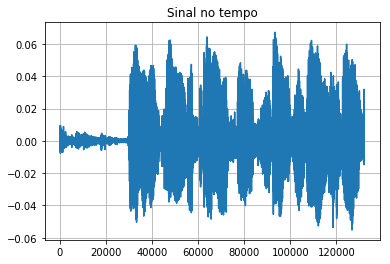

In [104]:
sd.default.samplerate = fs
sd.default.channels = 1
audio, samplerate = sf.read('recorded.wav')   
yAudio = audio
samplesAudio = len(yAudio)
sd.play(audio)
sd.wait()


#------ Plot do sinal no tempo -----
plt.plot(yAudio)
plt.grid()
plt.title('Sinal no tempo')

## Fourier do áudio original

Text(0.5, 1.0, 'Fourier do Áudio')

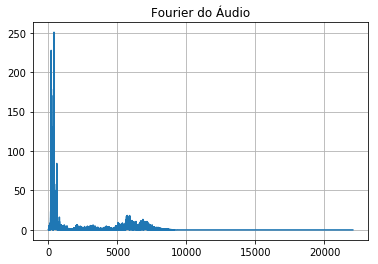

In [33]:
X, Y = signalMeu().calcFFT(yAudio, samplerate)
plt.figure()
plt.plot(X, np.abs(Y))
plt.grid()
plt.title('Fourier do Áudio')


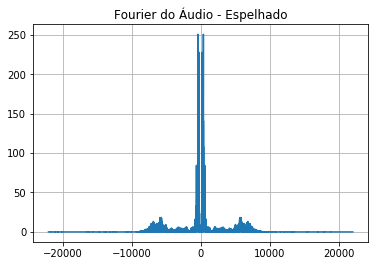

In [101]:
plotFFT(yAudio, fs, 'Fourier do Áudio - Espelhado')

## Normalização do sinal com Amplitude [-1,1]

Valor máximo de amplitude antes:  0.06719970703125


Text(0.5, 1.0, 'Sinal no tempo')

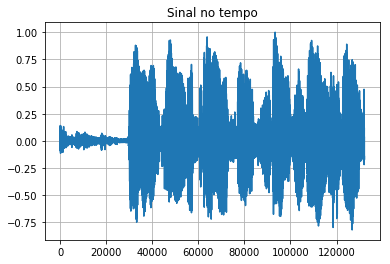

In [105]:
maxAmp = max(audio)
print("Valor máximo de amplitude antes: ", maxAmp)
norm = [float(i)/maxAmp for i in audio]

sd.play(norm)
sd.wait()

#------ Plot do sinal no tempo -----
plt.plot(norm)
plt.grid()
plt.title('Sinal no tempo')

Text(0.5, 1.0, 'Fourier do Áudio')

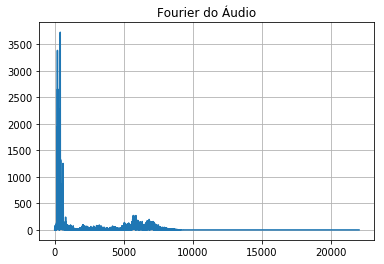

In [100]:
XA, YA = signalMeu().calcFFT(norm, samplerate)
plt.figure("Fourier Audio")
plt.plot(XA, np.abs(YA))
plt.grid()
plt.title('Fourier do Áudio')



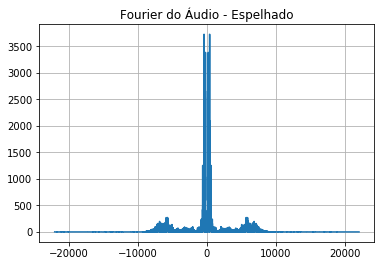

In [95]:
plotFFT(norm, fs, 'Fourier do Áudio - Espelhado')

## Filtro das frequências acima de 4000 Hz desse sinal

Text(0.5, 1.0, 'Filtrado no tempo')

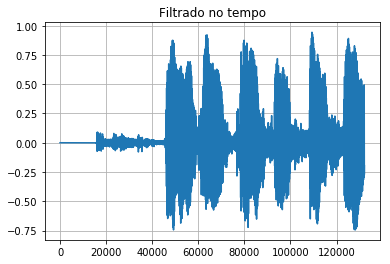

In [106]:
yFiltrado = LPF(norm, 4000, fs)
sd.play(yFiltrado)
sd.wait()
plt.plot(yFiltrado)
plt.grid()
plt.title('Filtrado no tempo')

## Fourier desse novo sinal

(0, 1500)

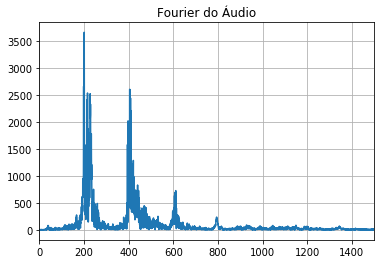

In [99]:
XF, YF = signalMeu().calcFFT(yFiltrado, samplerate)
plt.figure("Fourier Audio filtrado")
plt.plot(XF, np.abs(YF))
plt.grid()
plt.title('Fourier do Áudio')
plt.xlim(0,1500)

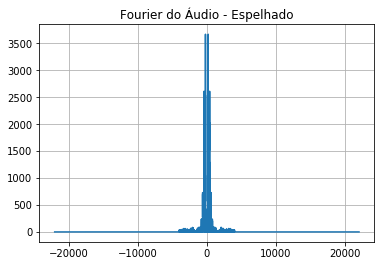

In [96]:
plotFFT(yFiltrado, fs, 'Fourier do Áudio - Espelhado')

## Sinal de áudio modulado com a portadora de 14000Hz

Text(0.5, 1.0, 'Filtrado no tempo')

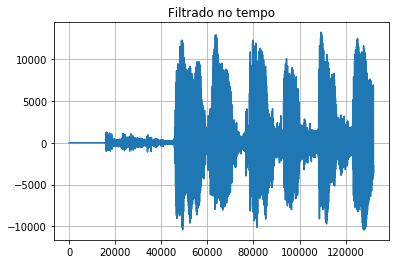

In [107]:
sinalAM = 14000*yFiltrado

sd.play(sinalAM)
sd.wait() 
plt.plot(sinalAM)
plt.grid()
plt.title('Filtrado no tempo')

(0, 1500)

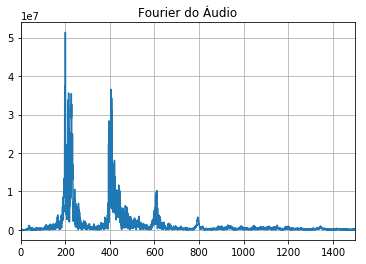

In [98]:
Xm, Ym = signalMeu().calcFFT(sinalAM, samplerate)
plt.figure("Fourier Audio filtrado")
plt.plot(Xm, np.abs(Ym))
plt.grid()
plt.title('Fourier do Áudio')
plt.xlim(0,1500)

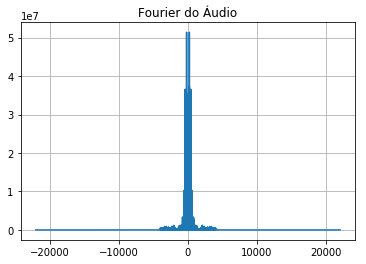

In [94]:
plotFFT(sinalAM, fs, 'Fourier do Áudio - Espelhado')

## Gráficos

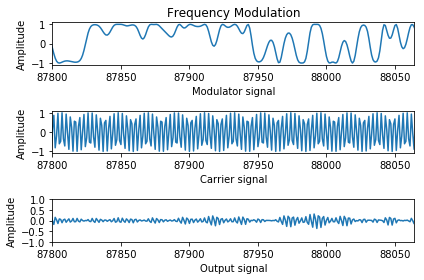

In [19]:
#modulator_frequency = 4.0
carrier_frequency = 14000.0
modulation_index = 1

fs = 44100.0 #frequencia de amostragem
time2 = np.arange((len(yFiltrado)/44100)*fs) / fs
modulator = np.sin(2.0 * np.pi * yFiltrado * time2) * modulation_index

carrier = np.sin(2.0 * np.pi * carrier_frequency * time2)
#print(len(yFiltrado))
#print(len(carrier))
fm = np.zeros_like(yFiltrado)

am = yFiltrado*carrier


plt.subplot(3, 1, 1)
plt.title('Frequency Modulation')
plt.plot(modulator)
plt.xlim(87800,88064)
plt.ylabel('Amplitude')
plt.xlabel('Modulator signal')
plt.subplot(3, 1, 2)
plt.plot(carrier)
plt.xlim(87800,88064)
plt.ylabel('Amplitude')
plt.xlabel('Carrier signal')
plt.subplot(3, 1, 3)
plt.plot(am)
plt.xlim(87800,88064)
plt.ylabel('Amplitude')
plt.xlabel('Output signal')
plt.tight_layout()
plt.show()

## Demodulação

In [19]:
import cmath
x=[]
for k in am:
    x.append(complex(k, cmath.cos(cmath.asin(k))))
    
df=1
n = np.arange(len(x))
rx = x*np.exp(-1j*2*np.pi*carrier*n)
   # Extract phase of carrier.
phi = np.arctan2(np.imag(rx), np.real(rx))
   # Calculate frequency from phase.
demod = np.diff(np.unwrap(phi)/(2*np.pi*df))
sd.play(demod) #ouve o arquivo filtrado
sd.wait()

Text(0.5, 1.0, 'Sinal demodulado no tempo')

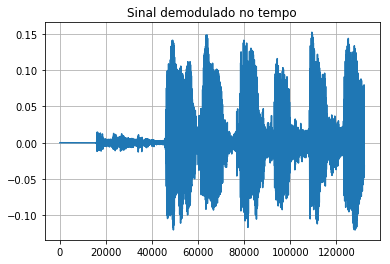

In [108]:
sinalDemodulado = audio[0]*sinalAM*audio[1]
sd.play(sinalDemodulado)
sd.wait()
plt.plot(sinalDemodulado)
plt.grid()
plt.title('Sinal demodulado no tempo')

Text(0.5, 1.0, 'Fourier do Áudio')

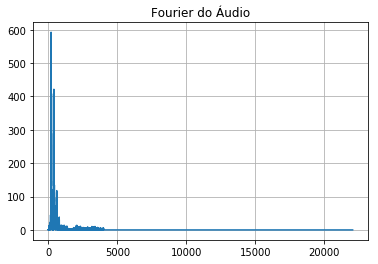

In [76]:
XD, YD = signalMeu().calcFFT(sinalDemodulado, samplerate)
plt.figure()
plt.plot(XD, np.abs(YD))
plt.grid()
plt.title('Fourier do Áudio')



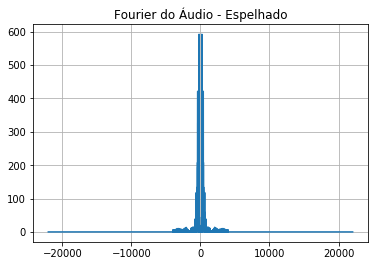

In [97]:
plotFFT(sinalDemodulado, fs, 'Fourier do Áudio - Espelhado')